In [1]:
from core.data import LiteratureDataset
from core.nlp import NlpPipeline
from core.viz import DataViz

dataset = LiteratureDataset()
nlp_pipeline = NlpPipeline()
data_viz = DataViz()

[nltk_data] Downloading package punkt to /home/husmen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/husmen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/data/ws/MedicalResearchTextAnalyser/.venv/lib64/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


## Dataset Preparation

In [2]:
# Dataset creation
dataset.load_data()
dataset.preview_data()

4
D1: Articles - Full
<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 33 to 765
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          500 non-null    object 
 1   Abstract       500 non-null    object 
 2   Authors        500 non-null    object 
 3   Year           500 non-null    int64  
 4   Cited by       500 non-null    float64
 5   Document Type  500 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.3+ KB
                                                 Title  \
33   Large language models for structured reporting...   
125  Radiomics and Deep Learning for Disease Detect...   
87   Online for on Call: A Study Assessing the Use ...   
96   Diagnostic radiology and its future: what do c...   
127  ChestXRayBERT: A Pretrained Language Model for...   

                                              Abstract  \
33   Structured reporting may improve the radiologi...  

In [3]:
# list of abstracts as D1-4
dataset_abs = [dataset.get_abstracts(i) for i in range(len(dataset))]

for desc, db in zip(dataset.data_description, dataset_abs, strict=True):
    print(f"{desc} ({len(db)} works)")
    print(f"\tSample: {db[0]}")

D1: Articles - Full (500 works)
	Sample: Structured reporting may improve the radiological workflow and communication among physicians. Artificial intelligence applications in medicine are growing fast. Large language models (LLMs) are recently gaining importance as valuable tools in radiology and are currently being tested for the critical task of structured reporting. We compared four LLMs models in terms of knowledge on structured reporting and templates proposal. LLMs hold a great potential for generating structured reports in radiology but additional formal validations are needed on this topic. © 2023, Italian Society of Medical Radiology.
D2: Reviews - Full (42 works)
	Sample: Automated labelling of radiology reports using natural language processing allows for the labelling of ground truth for large datasets of radiological studies that are required for training of computer vision models. This paper explains the necessary data preprocessing steps, reviews the main methods for au

## NLP Pipeline

In [4]:
# Preprocessing
dataset_tkns = [nlp_pipeline.preprocess(db) for db in dataset_abs]

for desc, db in zip(dataset.data_description, dataset_tkns, strict=True):
    print(f"{desc} ({len(db)} works)")
    print(f"\tSample: {db[0]}")

D1: Articles - Full (500 works)
	Sample: ['structur', 'report', 'may', 'improv', 'radiolog', 'workflow', 'communic', 'among', 'physician', 'artifici', 'intellig', 'applic', 'medicin', 'grow', 'fast', 'larg', 'languag', 'model', 'llms', 'recent', 'gain', 'import', 'valuabl', 'tool', 'radiolog', 'current', 'test', 'critic', 'task', 'structur', 'report', 'compar', 'four', 'llms', 'model', 'term', 'knowledg', 'structur', 'report', 'templat', 'propos', 'llms', 'hold', 'great', 'potenti', 'generat', 'structur', 'report', 'radiolog', 'addit', 'formal', 'valid', 'need', 'topic', 'italian', 'societi', 'medic', 'radiolog']
D2: Reviews - Full (42 works)
	Sample: ['autom', 'label', 'radiolog', 'report', 'use', 'natur', 'languag', 'process', 'allow', 'label', 'ground', 'truth', 'larg', 'dataset', 'radiolog', 'studi', 'requir', 'train', 'comput', 'vision', 'model', 'paper', 'explain', 'necessari', 'data', 'preprocess', 'step', 'review', 'main', 'method', 'autom', 'label', 'compar', 'perform', 'four'

In [5]:
# Stats
dataset_stats = [nlp_pipeline.stats(db) for db in dataset_tkns]
dataset_w_count = [db[0] for db in dataset_stats]
dataset_tf_idf = [db[1] for db in dataset_stats]

for desc, db in zip(dataset.data_description, dataset_stats, strict=True):
    w_count, tf_idf = db

    print(f"{desc} (Word Count)")
    print(w_count.head(10))

    print(f"{desc} (TF-IDF)")
    print(tf_idf.head(10))

D1: Articles - Full (Word Count)
report         2303
radiolog       1417
use             975
imag            760
system          671
radiologist     587
model           552
patient         499
result          497
studi           469
dtype: int64
D1: Articles - Full (TF-IDF)
report         40.111362
radiolog       27.709557
imag           21.576626
system         20.775899
use            20.243695
model          19.178510
radiologist    15.987942
inform         14.577802
patient        14.353486
find           13.914347
dtype: float64
D2: Reviews - Full (Word Count)
radiolog       137
report         130
radiologist     63
imag            60
data            59
use             53
applic          47
ai              46
studi           44
clinic          44
dtype: int64
D2: Reviews - Full (TF-IDF)
radiolog       3.517760
report         3.271556
ai             2.669811
nlp            2.549695
radiologist    2.216996
applic         2.162786
data           2.112605
imag           2.105953
clini

In [12]:
dataset_empath = [nlp_pipeline.empath(db) for db in dataset_tkns]
dataset_empath_sorted = [{k: v for k, v in sorted(db.items(), key=lambda item: item[1], reverse=True)} for db in dataset_empath]

for desc, db in zip(dataset.data_description, dataset_empath_sorted, strict=True):
    print(f"{desc} (Empath)")
    print(db)

D1: Articles - Full (Empath)
{'communication': 0.0600928913954821, 'work': 0.04564646982537624, 'meeting': 0.0443948487498869, 'journalism': 0.0396598003438188, 'crime': 0.035256506921615346, 'speaking': 0.026977712096993095, 'programming': 0.0257411707934976, 'technology': 0.024187954278131314, 'health': 0.023222848870525076, 'medical_emergency': 0.02035769219169406, 'computer': 0.019030672256235486, 'internet': 0.017296498476943027, 'school': 0.01717586030099225, 'help': 0.012757487106794946, 'music': 0.012531290526887234, 'healing': 0.011536025575293301, 'messaging': 0.01106855264348403, 'reading': 0.010314564043791658, 'fashion': 0.009515336128117743, 'phone': 0.009123262056277708, 'writing': 0.009093102512290015, 'traveling': 0.008082757788702235, 'musical': 0.007374008504991404, 'military': 0.00722321078505293, 'dance': 0.00716289169707754, 'college': 0.0068763760291944385, 'office': 0.0065295412733359474, 'art': 0.00633350423741593, 'science': 0.005971589709563591, 'business': 0

## Visualization

D1: Articles - Full (Word Cloud)


/tmp/ipykernel_25550/2030426254.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


D2: Reviews - Full (Word Cloud)
D3: Articles - Recent (Word Cloud)
D4: Reviews - Recent (Word Cloud)


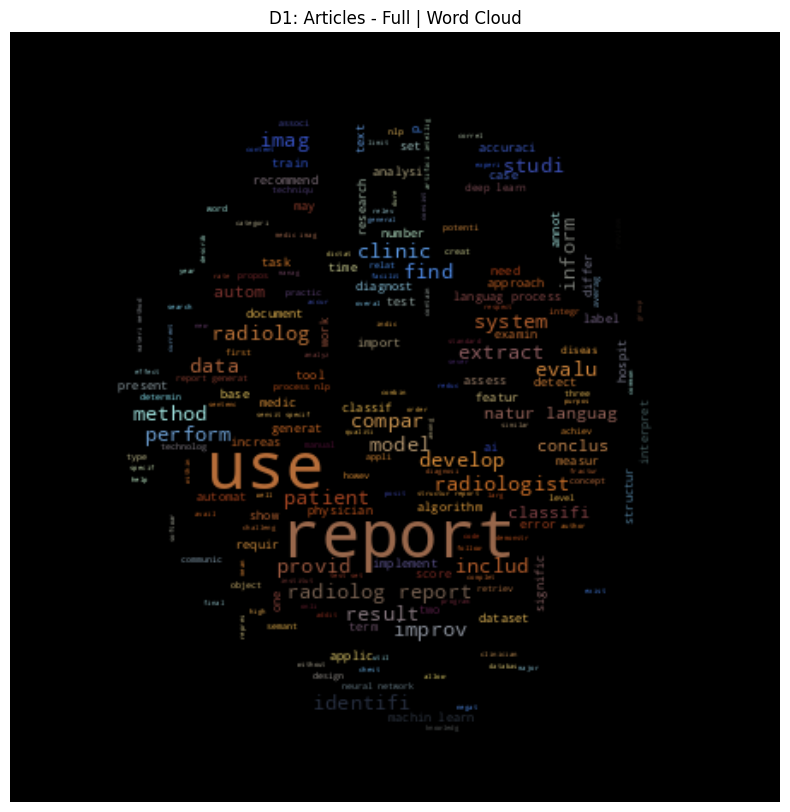

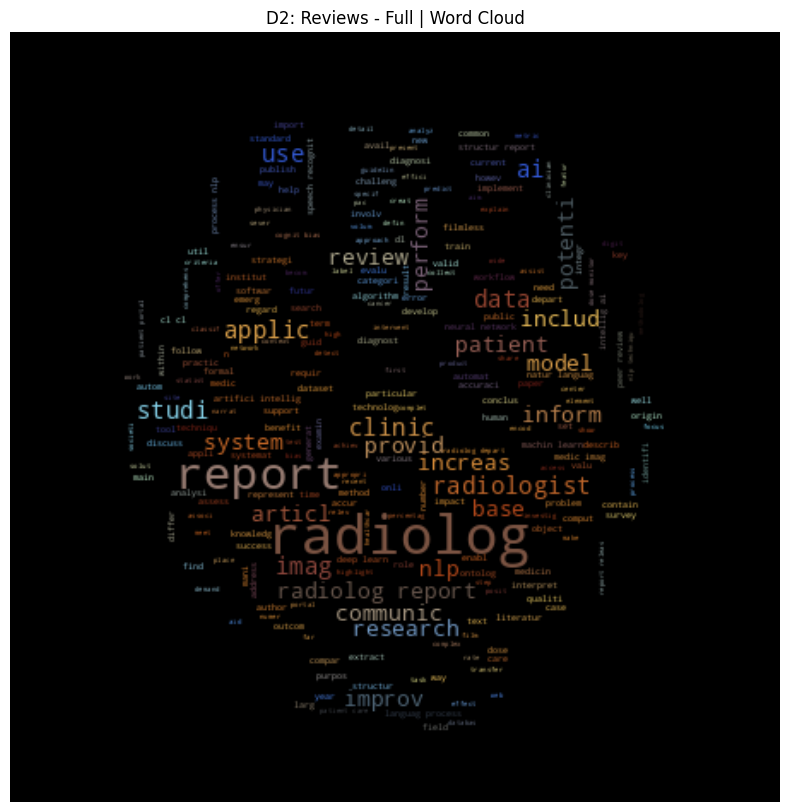

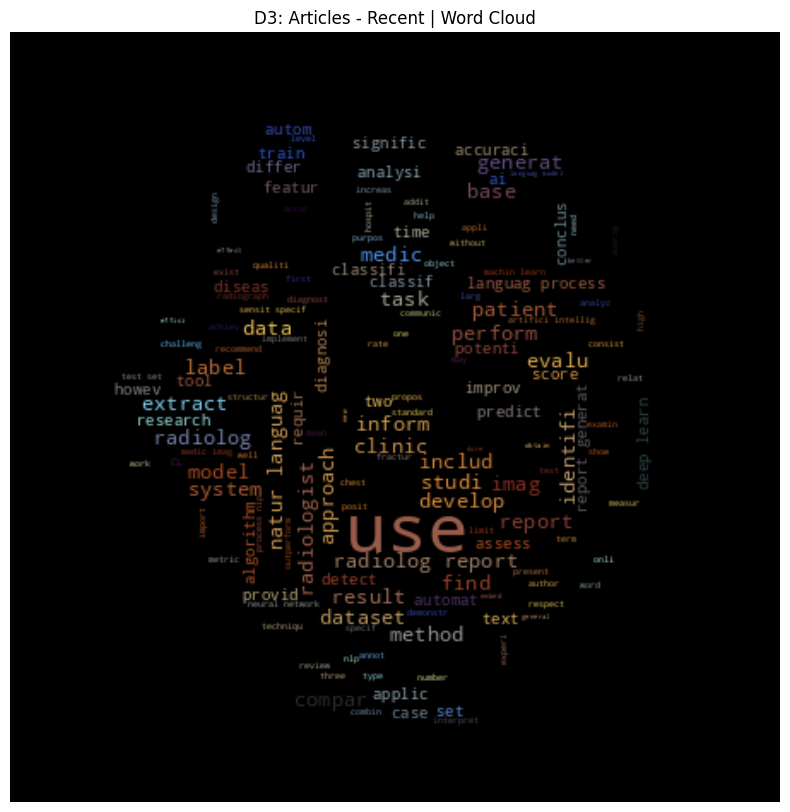

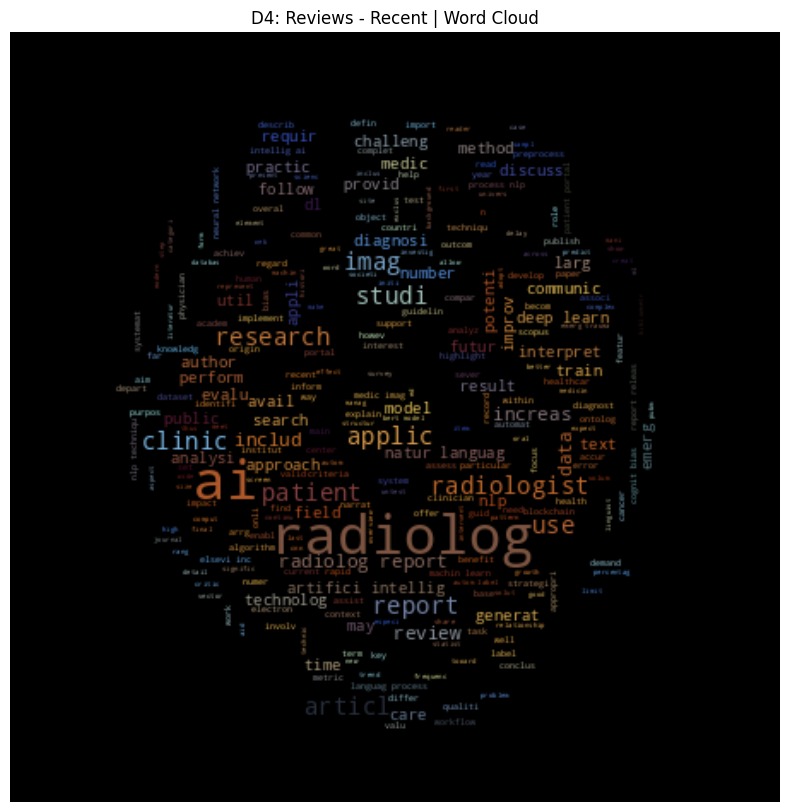

In [ ]:
# Word Clouds
for desc, db in zip(dataset.data_description, dataset_tkns, strict=True):
    db_text = " ".join([w for doc in db for w in doc])
    fig = data_viz.word_cloud(db_text, desc)
    fig.show()

/tmp/ipykernel_26087/985280320.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_26087/985280320.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_26087/985280320.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_26087/985280320.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


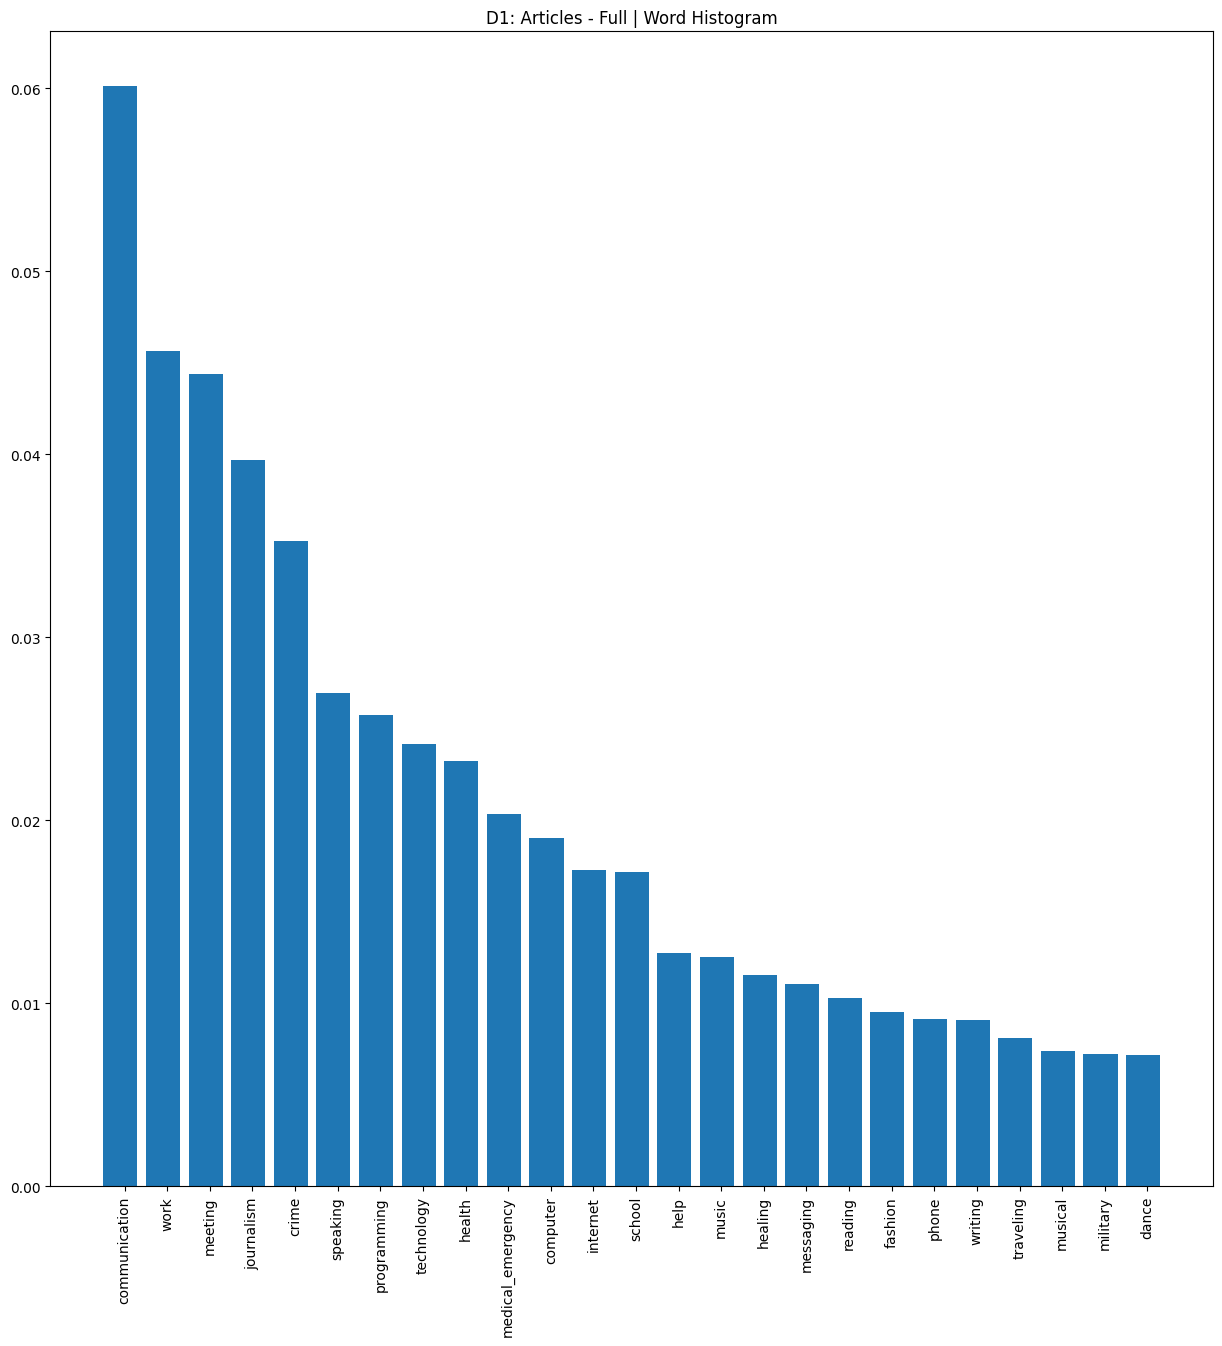

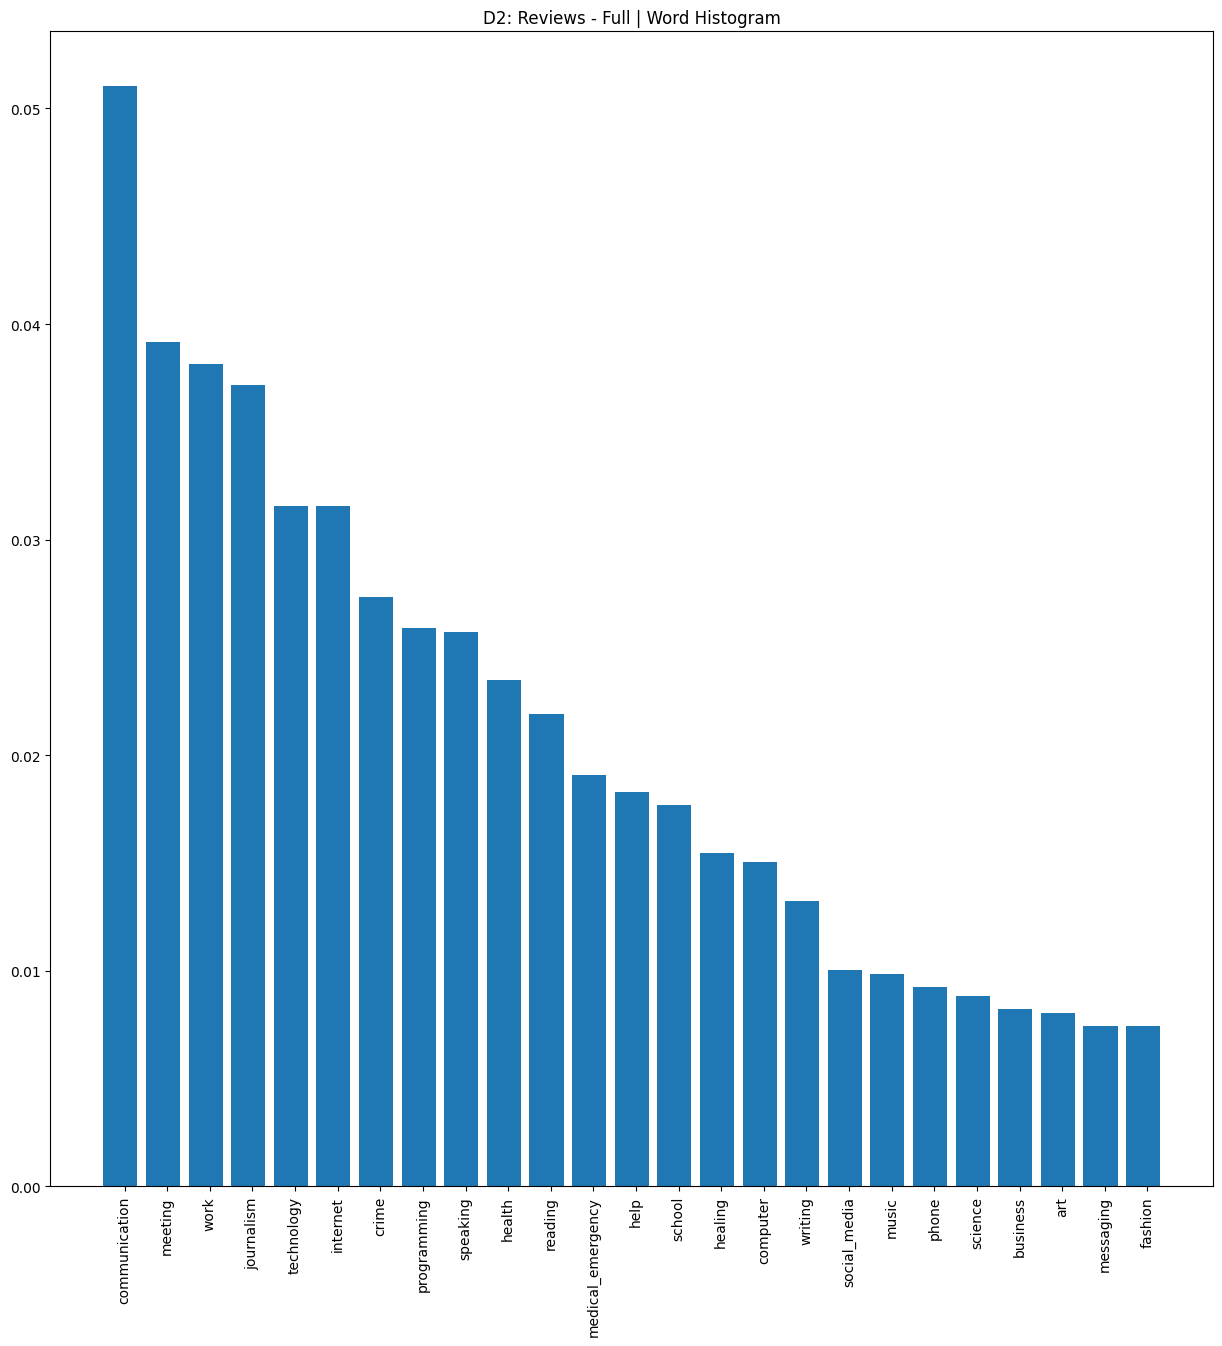

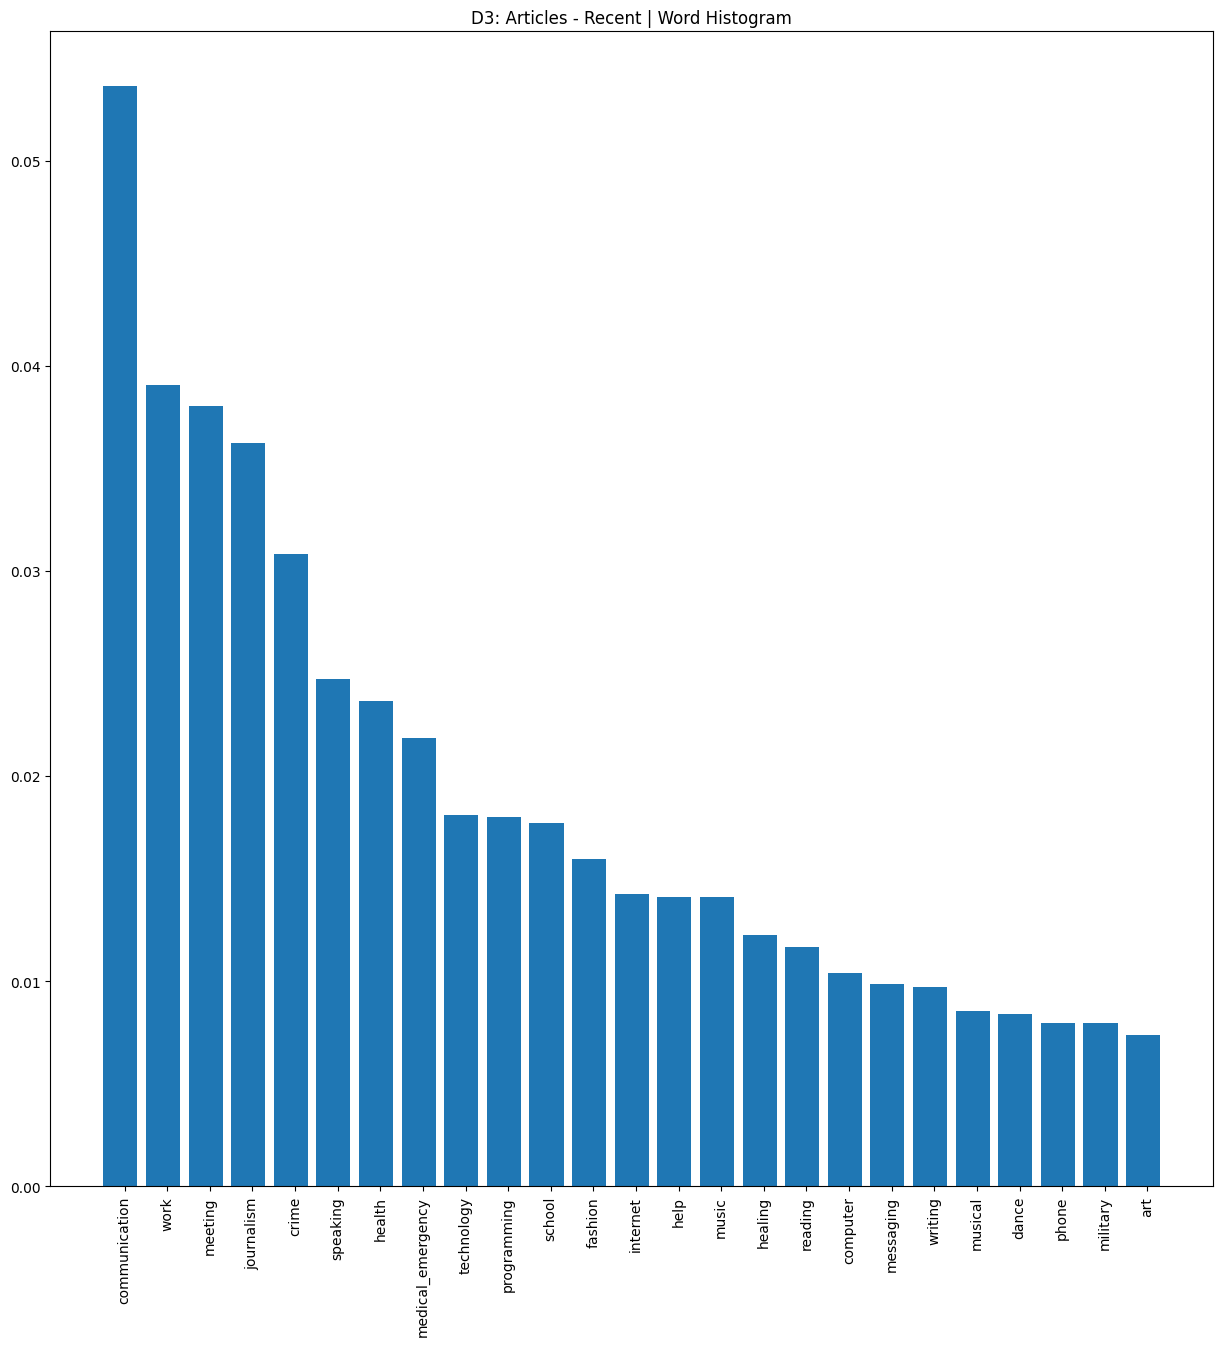

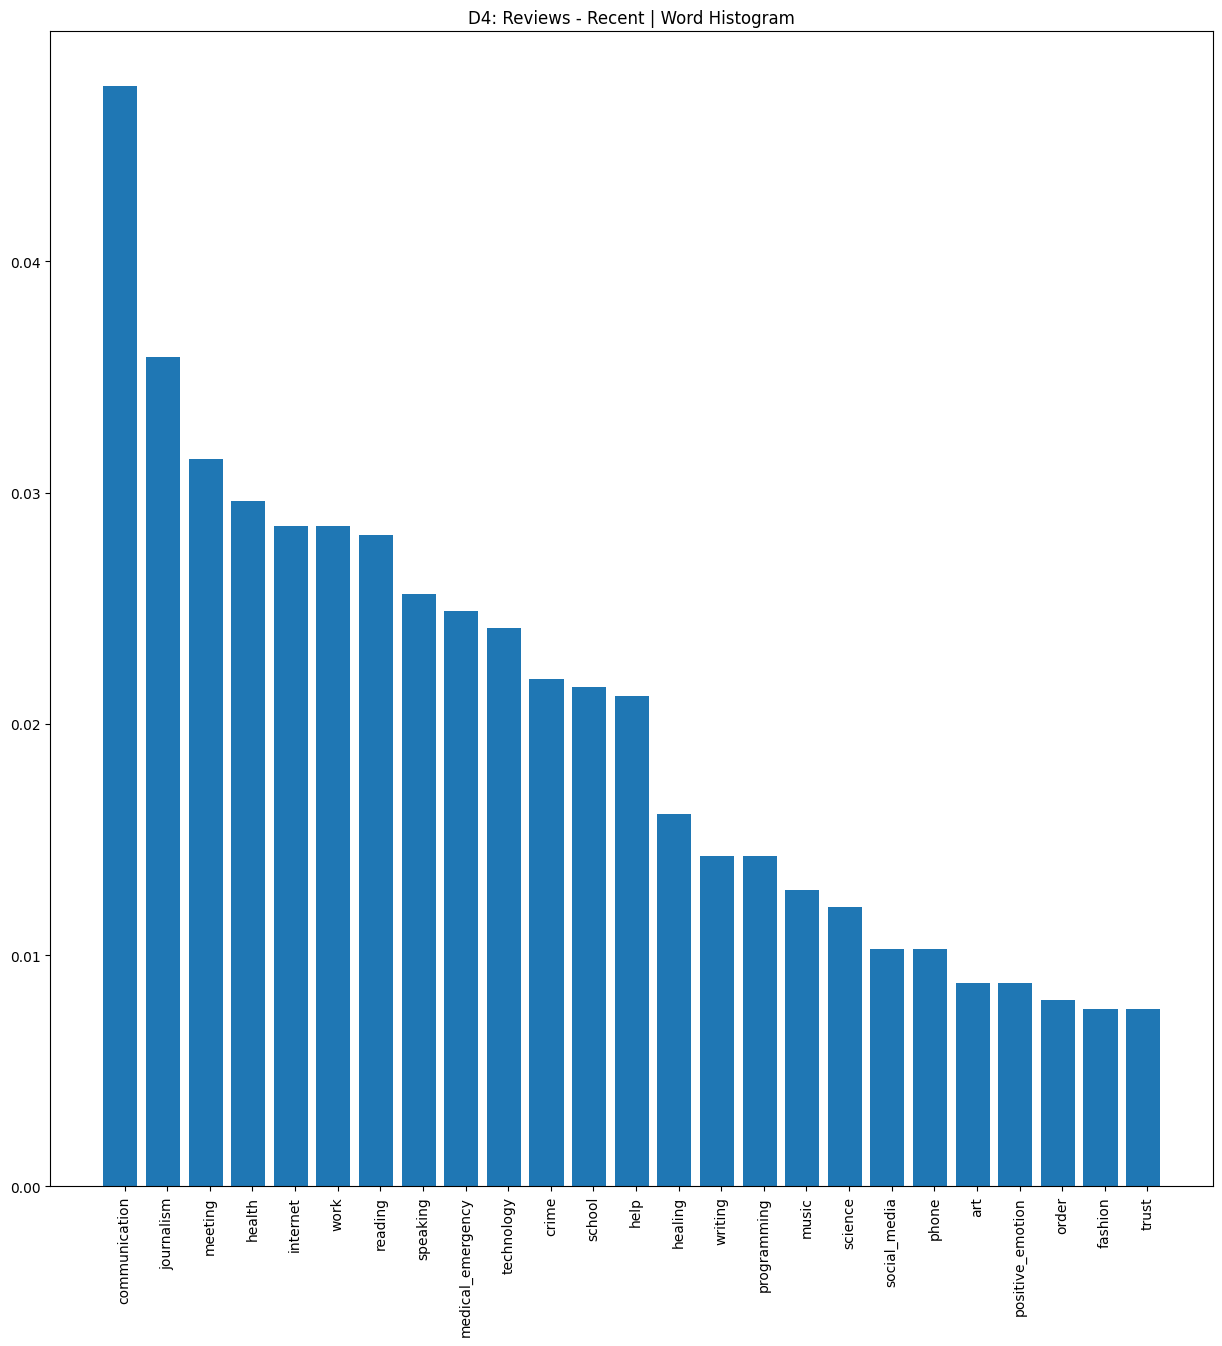

In [13]:
# Word histogram
for desc, db in zip(dataset.data_description, dataset_empath_sorted, strict=True):
    fig = data_viz.word_hist(db, desc)
    fig.show()